# Hypotheses 1 A,B,C

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
sns.set_context("talk")


## Exclusions and Outliers
-- 3 subject sub-5f706a963b6ac2627a4bb3b5 & sub-611c31c77df20ecc6881cc44 reported 0 variance distributions

In [16]:
sub_df=[]
subs = [sub for sub in os.listdir('bids') if os.path.isdir(os.path.join('bids', sub)) and not sub.startswith('.')]
exclude=[]
for sub in subs:
    #print(sub)
    if sub not in['subjects.tsv']:#,'sub-5f706a963b6ac2627a4bb3b5','sub-611c31c77df20ecc6881cc44',
                 #'sub-5d8aa95dd06260000179442b']:#reported 0 variance distributions
        mem=pd.read_csv('bids/%s/%s_mem-report.tsv'%(sub,sub),sep='\t')
        mem['value']=pd.to_numeric(mem['value'])
        
        
        mem.loc[mem['value'] < 0, 'value'] = 0
        
        mem=pd.DataFrame(mem.values.repeat(mem.value, axis=0), columns=mem.columns)
        mem.percent=pd.to_numeric(mem.percent)
        mem['value']=pd.to_numeric(mem['value'])
        mem['order']=pd.to_numeric(mem['order'])
        mem=mem[['dist','percent','value','order']]
        O_df=mem.groupby('dist').mean().reset_index()
        order_var=O_df[O_df['dist']=='wide']['order'].values-O_df[O_df['dist']=='narrow']['order'].values
        if len(mem.groupby('dist').mean())>2:
            mem_df=pd.DataFrame()
            mem_df['dist']=['narrow','skew','wide']
            mem_df['narrow_first']=order_var[0]
            mem_df['means']=mem.groupby('dist').mean()['percent'].values
            mem_df['stds']=mem.groupby('dist').std()['percent'].values
            mem_df['skew']=mem.groupby('dist').skew()['percent'].values
            mem_df['sub']=(sub)
            sub_df.append(mem_df)
            if any(mem_df['stds']==0):
                exclude.append(sub)
                
            
        else:
            #print(sub)
            pass
sub_df=pd.concat(sub_df)
sub_df=sub_df.reset_index()
#sub_df=sub_df[~sub_df['sub'].isin(exclude)]
sub_df.head()
print(len(exclude))

1


In [18]:
import statsmodels.api as sm
row=[]
for sub in sub_df['sub'].unique():
    df=pd.read_csv('bids/%s/%s_task-amb_run-1_events.tsv'%(sub,sub),
                   sep='\t')
    #if any(df[df['choice']=='Ambiguity']['per']==100):
    #    exclude.append(sub)
    #elif any(df[df['choice']=='risk']['per']==0):
    #    exclude.append(sub)


In [20]:
print("Out of %s participants an additional %s were excluded do to choice checks"%(len(
    sub_df['sub'].unique()),len(exclude)))
print("This leaves us with a total of %s"%(len(
    sub_df['sub'].unique())-len(exclude)))

Out of 17 participants an additional 1 were excluded do to choice checks
This leaves us with a total of 16


## Manipulation Check
Notes:
- Some negative frequencies were reported were making them 0
- Some reports were not filled for all distributions


In [23]:
sub_df=sub_df[~sub_df['sub'].isin(exclude)]
len(sub_df['sub'].unique())

16

/var/folders/m6/p7f91dqd37d_mdjnjbx6xdy80000gn/T/ipykernel_60563/2673393260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dist',y='means',data=sub_df, ax=ax[0],order=['narrow','wide','skew'],
/var/folders/m6/p7f91dqd37d_mdjnjbx6xdy80000gn/T/ipykernel_60563/2673393260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='dist',y='stds',data=sub_df, ax=ax[1],order=['narrow','wide','skew'],
/var/folders/m6/p7f91dqd37d_mdjnjbx6xdy80000gn/T/ipykernel_60563/2673393260.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Narrow','Wide','Skewed'], minor=False)


Testing if wide distributions were reported with greater deviationthan narrow distributions 
 t: -5.217043133373337 p: 0.00010429911273980952


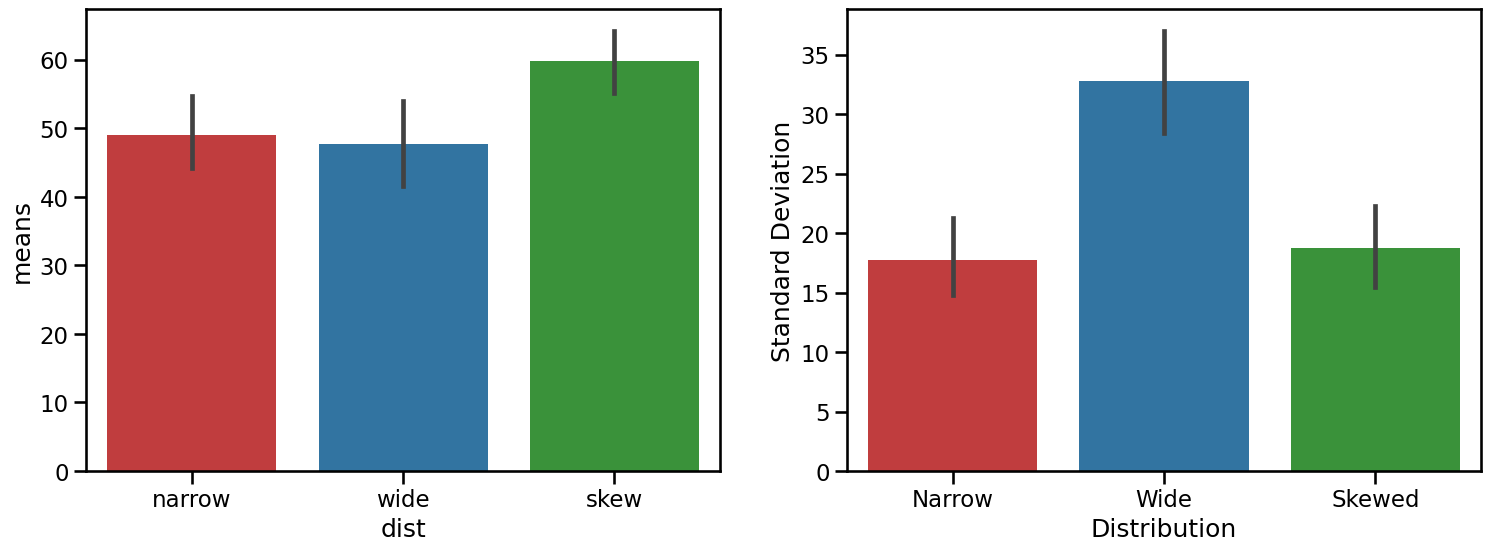

In [25]:
from scipy.stats import ttest_rel
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x='dist',y='means',data=sub_df, ax=ax[0],order=['narrow','wide','skew'],
            palette=['tab:red','tab:blue','tab:green'],)
plt.ylabel('Mean of Reported Distribution')
ax=sns.barplot(x='dist',y='stds',data=sub_df, ax=ax[1],order=['narrow','wide','skew'],
           palette=['tab:red','tab:blue','tab:green'])
plt.xlabel('Distribution')
ax.set_xticklabels(['Narrow','Wide','Skewed'], minor=False)
plt.ylabel('Standard Deviation')
#sns.barplot(x='dist',y='skew',data=sub_df, ax=ax[2])
t,p=ttest_rel(sub_df[sub_df['dist']=='narrow']['stds'],
              sub_df[sub_df['dist']=='wide']['stds'])

print("Testing if wide distributions were reported with greater deviation"+
      "than narrow distributions \n t: %s p: %s"
     %(t,p))

plt.show()

In [27]:
sub_df

,index,dist,narrow_first,means,stds,skew,sub
0,0,narrow,1.0,39.000000,13.703203,-1.075203,sub-6081ca47eeed1bb51c1d7f7b
1,1,skew,1.0,66.363636,16.895400,-0.059062,sub-6081ca47eeed1bb51c1d7f7b
2,2,wide,1.0,71.000000,21.317703,-0.247737,sub-6081ca47eeed1bb51c1d7f7b
3,0,narrow,2.0,48.888889,12.782750,-0.339520,sub-611688156f6d22853511ffb3
4,1,skew,2.0,60.666667,20.862361,0.007342,sub-611688156f6d22853511ffb3
5,2,wide,2.0,29.285714,40.280609,0.991689,sub-611688156f6d22853511ffb3
6,0,narrow,1.0,44.687500,16.845479,-0.244749,sub-5deb638bff7f7126d6fb5142
7,1,skew,1.0,55.116279,18.692001,-0.248509,sub-5deb638bff7f7126d6fb5142
8,2,wide,1.0,42.857143,34.338996,0.441846,sub-5deb638bff7f7126d6fb5142
9,0,narrow,2.0,79.000000,17.919573,-0.393917,sub-5bd6656a669ee1000145304a


In [29]:
sub_df['Experiment']=2
sub_df.to_csv('Belief_df_E2.csv')

0
1
2
3
4
5


/var/folders/m6/p7f91dqd37d_mdjnjbx6xdy80000gn/T/ipykernel_60563/2212164778.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Narrow','Wide','Skewed'], minor=False)


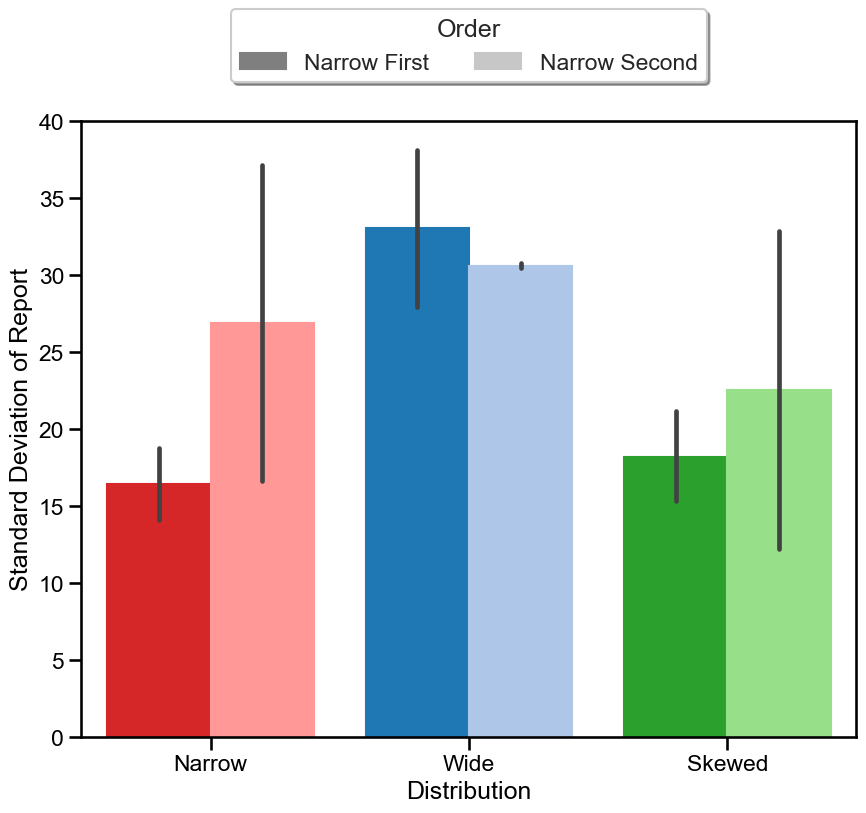

In [31]:
plt_df=sub_df.copy()
plt_df['Order']=plt_df['narrow_first']<0
fig, ax = plt.subplots(1,figsize=(10, 8))

sns.set_context("talk")
sns.set_style("white")
ax=sns.barplot(x='dist',y='stds',ax=ax,data=plt_df,hue='Order',order=['narrow','wide','skew'])
for x,bar in enumerate(ax.patches):
    if x==0:
        print(x)
        bar.set_color(plt.cm.tab10(3))
    if x==1:
        print(x)
        bar.set_color(plt.cm.tab10(0))
    if x==2:
        print(x)
        bar.set_color(plt.cm.tab10(2))
    if x==3:
        print(x)
        bar.set_color(plt.cm.tab20(x%3+7))
    if x==4:
        print(x)
        bar.set_color(plt.cm.tab20(x%3))
    if x==5:
        print(x)
        bar.set_color(plt.cm.tab20(x%3+3))
colors = {'Narrow First':plt.cm.tab20(14), 'Narrow Second':plt.cm.tab20(15)}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles=handles,labels = labels,title='Order',loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=2, fancybox=True, shadow=True)
plt.xlabel('Distribution')
ax.set_xticklabels(['Narrow','Wide','Skewed'], minor=False)
plt.ylabel('Standard Deviation of Report')
plt.ylim(0, 40) 
plt.show()

1= wide after narrow
-1= wide before narrow

0
1
2
3


/var/folders/m6/p7f91dqd37d_mdjnjbx6xdy80000gn/T/ipykernel_60563/3967582106.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Narrow','Wide'], minor=False)


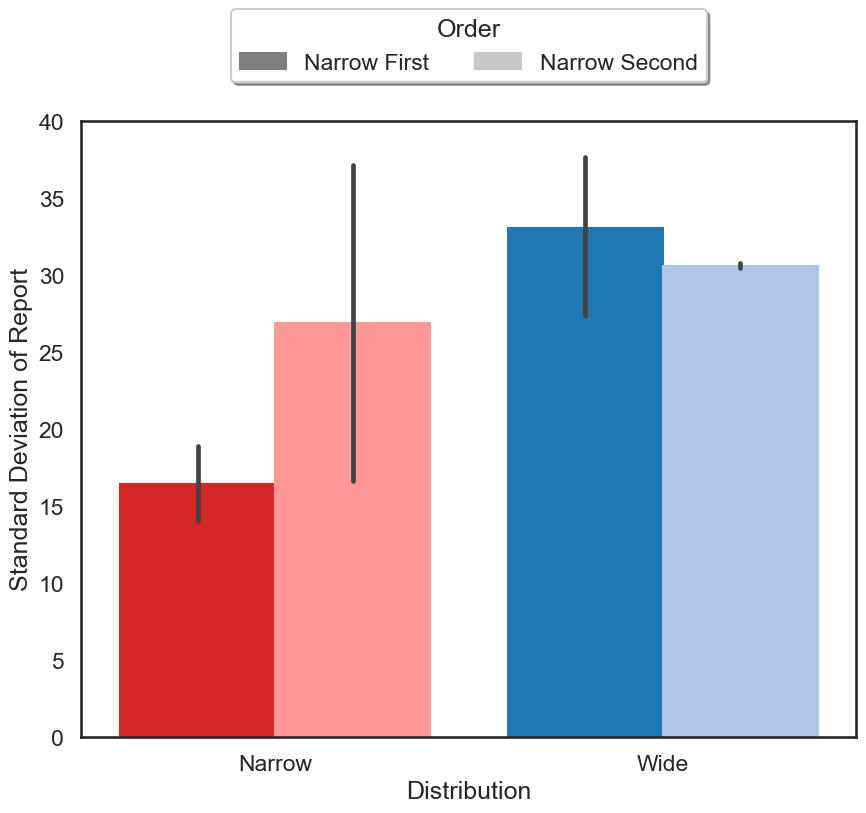

Test for order effects on wide t: -0.912457969731888 p: 0.37798471379744814 
Test for order effects on narrow t: 1.010488405296376 p: 0.49244582107701607 


In [34]:
from scipy.stats import ttest_ind

import matplotlib.colors

plt_df=sub_df.copy()
plt_df['Order']=plt_df['narrow_first']<0
fig, ax = plt.subplots(1,figsize=(10, 8))

sns.set_context("talk")
sns.set_style("white")
ax=sns.barplot(x='dist',y='stds',ax=ax,data=plt_df,hue='Order',order=['narrow','wide'])
for x,bar in enumerate(ax.patches):
    if x==0:
        print(x)
        bar.set_color(plt.cm.tab10(3))
    if x==1:
        print(x)
        bar.set_color(plt.cm.tab10(0))
    if x==2:
        print(x)
        bar.set_color(plt.cm.tab20(7))
    if x==3:
        print(x)
        bar.set_color(plt.cm.tab20(1))

colors = {'Narrow First':plt.cm.tab20(14), 'Narrow Second':plt.cm.tab20(15)}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles=handles,labels = labels,title='Order',loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=2, fancybox=True, shadow=True)
plt.xlabel('Distribution')
ax.set_xticklabels(['Narrow','Wide'], minor=False)
plt.ylabel('Standard Deviation of Report')
plt.ylim(0, 40) 
plt.show()

group1 = plt_df[(plt_df['narrow_first']==-1)&(plt_df['dist']=='wide')]
group2 = plt_df[~(plt_df['narrow_first']==-1)&(plt_df['dist']=='wide')]
t,p=ttest_ind(group1['stds'], group2['stds'],equal_var=False)
print("Test for order effects on wide t: %s p: %s "%(t,p))

group1 = plt_df[(plt_df['narrow_first']==-1)&(plt_df['dist']=='narrow')]
group2 = plt_df[~(plt_df['narrow_first']==-1)&(plt_df['dist']=='narrow')]
t,p=ttest_ind(group1['stds'], group2['stds'],equal_var=False)
print("Test for order effects on narrow t: %s p: %s "%(t,p))


In [36]:
len(group1)+len(group2)


16

In [38]:
print(len(group1)+len(group2)-2)

14


# Hypothesis 1A:
- During the ambiguous decision task, participants will be more averse to ambiguous lotteries which were associated with a high compared to low variance in the probabilities, learned during a prior risky decision task. 
- Choice ~ Probability + distri|bution [‘wide’, ‘narrow’] + (1|sub) 

In [43]:
amb_df=[]
for sub in sub_df['sub'].unique():
        amb=pd.read_csv('bids/%s/%s_task-amb_run-1_events.tsv'%(sub,sub),sep='\t')
        amb['sub']=sub
        amb['order']=sub_df[sub_df['sub']==sub]['narrow_first']
        amb_df.append(amb)
amb_df=pd.concat(amb_df)

print("no NA values for choice ",amb_df['choice'].unique())
amb_df['choose_risk']=amb_df['choice']=='risk'
print("no NA values for Amb ",amb_df['Amb'].unique())
amb_df['full_A']=amb_df['Amb']=='[0,1]'
print("no NA values for dist ",amb_df['dist'].unique())
amb_df['wide_dist']=amb_df['dist']=='wide'


amb_df.head()


no NA values for choice  ['risk' 'Ambiguous']
no NA values for Amb  ['[0.25,0.75]' '[0,1]']
no NA values for dist  ['narrow' 'wide' 'skew']


,Blocktype,tnum,rt,color,per,Amb,choice,dist,side,response,sub,order,choose_risk,full_A,wide_dist
0,Ambiguity,0.0,4245.0,green,0.50,"[0.25,0.75]",risk,narrow,right,j,sub-6081ca47eeed1bb51c1d7f7b,1.0,True,False,False
1,Ambiguity,1.0,3621.0,green,0.40,"[0.25,0.75]",Ambiguous,narrow,right,f,sub-6081ca47eeed1bb51c1d7f7b,1.0,False,False,False
2,Ambiguity,2.0,2386.0,green,0.44,"[0.25,0.75]",risk,narrow,right,j,sub-6081ca47eeed1bb51c1d7f7b,1.0,True,False,False
3,Ambiguity,3.0,2293.0,green,0.40,"[0.25,0.75]",risk,narrow,left,f,sub-6081ca47eeed1bb51c1d7f7b,NaN,True,False,False
4,Ambiguity,4.0,2656.0,green,0.35,"[0.25,0.75]",Ambiguous,narrow,left,j,sub-6081ca47eeed1bb51c1d7f7b,NaN,False,False,False


In [45]:
from pymer4.models import Lmer
#model_df=amb_df[amb_df['full_A']==True].reset_index(drop=True)
model_df=amb_df
model_df=model_df[model_df['dist'].isin(['narrow','wide'])]

model = Lmer("choose_risk  ~ dist*full_A + (per|sub)",
             data=model_df, family = 'binomial')
#model.fit()
#display(model.summary())

display(model.fit(factors={"full_A": ["True", "False"],"wide_dist":["True","False"]}))


/opt/anaconda3/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: choose_risk~dist*full_A+(per|sub)

Family: binomial	 Inference: parametric

Number of observations: 960	 Groups: {'sub': 16.0}

Log-likelihood: -579.588 	 AIC: 1173.177

Random effects:

            Name      Var     Std
sub  (Intercept)  215.414  14.677
sub          per  906.779  30.113

             IV1  IV2   Corr
sub  (Intercept)  per -0.996

Fixed effects:



/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),0.404,-0.659,1.467,0.542,1.497,0.517,4.335,0.600,0.341,0.813,0.744,0.457,
distwide,0.666,0.200,1.133,0.238,1.947,1.222,3.103,0.661,0.550,0.756,2.803,0.005,**
full_A1,-0.385,-0.821,0.051,0.222,0.680,0.440,1.052,0.405,0.305,0.513,-1.732,0.083,.
distwide:full_A1,0.384,-0.214,0.982,0.305,1.469,0.808,2.671,0.595,0.447,0.728,1.259,0.208,


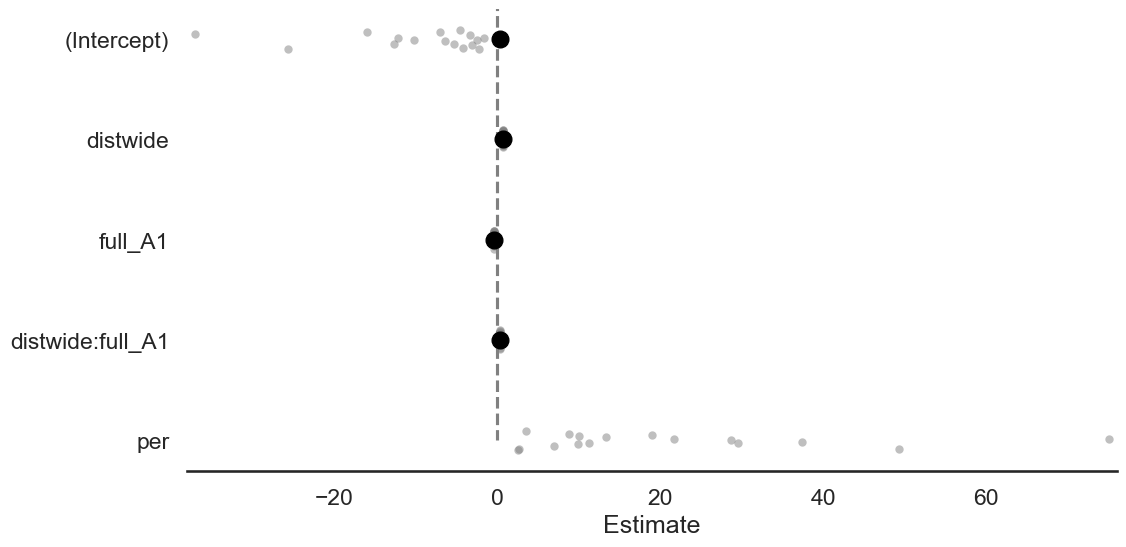

In [47]:
model.plot_summary()
plt.show()

In [49]:
subs=[]
for sub in model_df['sub'].unique():
    if len(model_df[(model_df['sub']==sub)&(model_df['dist']=='wide')])>0:
           if len(model_df[(model_df['sub']==sub)&(model_df['dist']=='narrow')])>0:
                  subs.append(sub)
subs

['sub-6081ca47eeed1bb51c1d7f7b',
 'sub-611688156f6d22853511ffb3',
 'sub-5deb638bff7f7126d6fb5142',
 'sub-5bd6656a669ee1000145304a',
 'sub-63bb0d793cee514d16b866ef',
 'sub-63eb13f36c0fe9ba20d45234',
 'sub-60abdc82ec2d1e548b986424',
 'sub-61057d03e42ef519f98f4e6d',
 'sub-63150b2e1cfa995c03244696',
 'sub-5df81cd72713055bdf02efd8',
 'sub-5d8793d36c53380015139da9',
 'sub-5de7d12c26dd95000b6824c5',
 'sub-5b6cd50f9ee1a50001c5f481',
 'sub-63eac31811a6da58d4f32d76',
 'sub-5f51287698edeb30a0cf878d',
 'sub-58a2952076c5b7000166150a']

In [65]:
from scipy.stats import chisquare
import numpy as np

model_df = model_df.copy()
model_df = model_df.reset_index(drop=True)  # Fix the duplicated index warning
model_df['full_A1'] = model_df['full_A']
model_df['distwide'] = model_df['wide_dist']
model_df['per:full_A1'] = model_df['per'] * model_df['full_A1']
model_df['per:wide_dist1'] = model_df['per'] * model_df['wide_dist']
model_df['full_A1:wide_dist'] = model_df['full_A1'] * model_df['wide_dist']
model_df['per:full_A1:wide_dist1'] = model_df['per'] * model_df['wide_dist'] * model_df['full_A1']

# Get predictions and convert from R object to numpy array
predictions = model.predict(model_df, skip_data_checks=True, verify_predictions=False)
y_pred = (np.array(predictions) > 0.5)
y_true = model_df['choose_risk'].values

print(chisquare([np.sum([a == p for a,p in zip(y_pred,y_true)]),
           np.sum([a != p for a,p in zip(y_pred,y_true)])]))
print(np.sum([a == p for a,p in zip(y_pred,y_true)])/len(y_pred))

Power_divergenceResult(statistic=148.8375, pvalue=3.1121530984503313e-34)
0.696875


In [69]:
# Get predictions and convert from R object to numpy array
predictions = model.predict(model_df, skip_data_checks=True, verify_predictions=False)
y_pred = np.array(predictions)
y_true = model_df['choose_risk'].values

def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)

efron_rsquare(y_true, y_pred)

0.2533931697695323

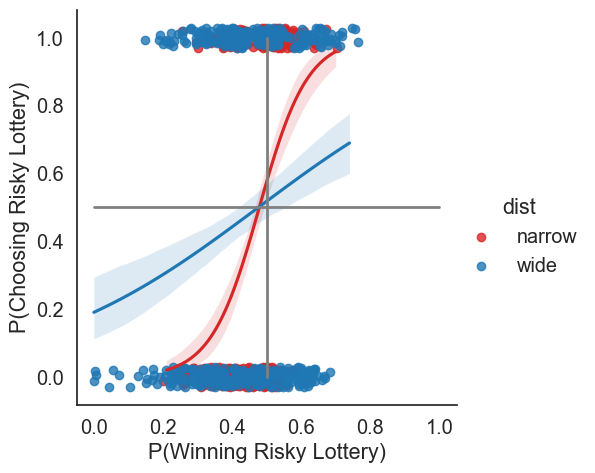

In [71]:
sns.set(font_scale=1.3)
plt_df=model_df.copy()
with sns.axes_style("white"):
    ax=sns.lmplot(x='per',y='choose_risk',hue='dist',hue_order=['narrow','wide'],
                  palette=["tab:red","tab:blue"],x_jitter=0.03,y_jitter=0.03,data=plt_df,logistic=True)
#plt.legend(labels = ['Narrow','Wide'],title='Distribution',loc='upper center', bbox_to_anchor=(0.5, 1.05),
#          ncol=2, fancybox=True, shadow=True)
ax.set_xlabels('P(Winning Risky Lottery)')
ax.set_ylabels('P(Choosing Risky Lottery)')
plt.plot([0,1], [0.5,0.5], linewidth=2,color='grey')
plt.plot([.50,.50], [0,1], linewidth=2,color='grey')
#plt.savefig('Figures/H1A_online.svg')


## Hypothesis 1c ( DISTRIBUTION EFFECT)

In [74]:

model_df=amb_df[(amb_df['full_A']==True)&(amb_df['sub'].isin(subs))].reset_index(drop=True)
model_w=model_df[model_df['dist'].isin(['wide'])]
model_n=model_df[model_df['dist'].isin(['narrow'])]

model_w = Lmer("choose_risk  ~ per+ (1+per|sub)",
             data=model_w, family = 'binomial')

model_w.fit()
model_n = Lmer("choose_risk  ~ per+ (1+per|sub)",
             data=model_n, family = 'binomial')

model_n.fit()

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: choose_risk~per+(1+per|sub)

Family: binomial	 Inference: parametric

Number of observations: 240	 Groups: {'sub': 16.0}

Log-likelihood: -133.495 	 AIC: 276.991

Random effects:

            Name      Var     Std
sub  (Intercept)  217.725  14.755
sub          per  947.341  30.779

             IV1  IV2   Corr
sub  (Intercept)  per -0.802

Fixed effects:

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: choose_risk~per+(1+per|sub)

Family: binomial	 Inference: parametric

Number of observations: 240	 Groups: {'sub': 16.0}

Log-likelihood: -114.912 	 AIC: 239.824

Random effects:

            Name       Var     Std
sub  (Intercept)   596.030  24.414
sub          per  2125.648  46.105

             IV1  IV2   Corr
sub  (Intercept)  per -0.985

Fixed effects:



/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-44.154,-69.394,-18.914,12.878,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-3.429,0.001,***
per,94.314,42.498,146.129,26.437,9.117102e+40,2.862644e+18,2.903664e+63,1.0,1.0,1.0,3.568,0.000,***


In [76]:
model_wFE=model_w.fixef.copy()
model_wFE.reset_index(inplace=True)
model_wFE=model_wFE.rename(columns={'index':'sub'})
model_nFE=model_n.fixef.copy()
model_nFE.reset_index(inplace=True)
model_nFE=model_nFE.rename(columns={'index':'sub'})
Med1_df=[]
for sub in model_df['sub'].unique():
    tmp=sub_df[sub_df['sub']==sub]
    for dist in ['narrow','wide']:
        if dist=='narrow':
            SD_N=tmp[tmp['dist']=='narrow']['stds'].values[0]
            Mean_N=tmp[tmp['dist']=='narrow']['means'].values[0]
            Int=model_nFE[model_nFE['sub']==sub]['(Intercept)'].values[0]
            ME_per=model_nFE[model_nFE['sub']==sub]['per'].values[0]
            Med1_df.append([sub,'narrow',SD_N,Mean_N,Int,ME_per])
            
        if dist=='wide':
            SD_W=tmp[tmp['dist']=='wide']['stds'].values[0]
            Mean_W=tmp[tmp['dist']=='wide']['means'].values[0]
            Int=model_wFE[model_wFE['sub']==sub]['(Intercept)'].values[0]
            ME_per=model_wFE[model_wFE['sub']==sub]['per'].values[0]
            Med1_df.append([sub,'wide',SD_W,Mean_W,Int,ME_per])    
    
                                           
Med1_df=pd.DataFrame(columns=['sub','dist','SD','MEAN','Intercept','ME_Per'],
                    data=Med1_df)
Med1_df['dist']=Med1_df['dist']=='narrow'
Med1_df['dist']=Med1_df['dist'].astype(int)

In [78]:
from pingouin import mediation_analysis
Med1_df['EP']=np.divide(np.negative(Med1_df['Intercept']),Med1_df['ME_Per'])
display(Med1_df)
mediation_analysis(data=Med1_df, x='dist', m=['SD'], y='EP',alpha=0.05,seed=42)

,sub,dist,SD,MEAN,Intercept,ME_Per,EP
0,sub-6081ca47eeed1bb51c1d7f7b,1,13.703203,39.000000,-22.064361,42.372790,0.520720
1,sub-6081ca47eeed1bb51c1d7f7b,0,21.317703,71.000000,-20.614789,33.373609,0.617697
2,sub-611688156f6d22853511ffb3,1,12.782750,48.888889,-24.071316,62.909875,0.382632
3,sub-611688156f6d22853511ffb3,0,40.280609,29.285714,-32.045778,85.507389,0.374772
4,sub-5deb638bff7f7126d6fb5142,1,16.845479,44.687500,-48.562000,109.595222,0.443103
5,sub-5deb638bff7f7126d6fb5142,0,34.338996,42.857143,-36.899439,92.309650,0.399735
6,sub-5bd6656a669ee1000145304a,1,17.919573,79.000000,-55.960925,107.472609,0.520699
7,sub-5bd6656a669ee1000145304a,0,40.124805,59.000000,-32.289094,89.085996,0.362449
8,sub-63bb0d793cee514d16b866ef,1,21.832697,51.000000,-16.233074,46.708838,0.347538
9,sub-63bb0d793cee514d16b866ef,0,16.914819,28.888889,-15.521797,47.765093,0.324961


,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,SD ~ X,-15.018721,2.883375,0.000013,-20.907358,-9.130084,Yes
1,Y ~ SD,-0.002651,0.001623,0.112859,-0.005966,0.000664,No
2,Total,0.021700,0.036702,0.558788,-0.053255,0.096655,No
3,Direct,-0.034502,0.049237,0.489061,-0.135203,0.066200,No
4,Indirect,0.056201,0.050608,0.168000,-0.024450,0.184373,No


In [80]:
plt_df=Med1_df.groupby(by='sub').diff().dropna()

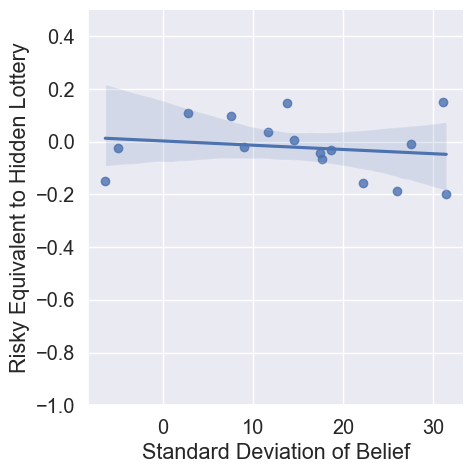

In [84]:
plt_df=Med1_df.groupby(by='sub').diff().dropna()
with sns.axes_style("darkgrid"):
    ax=sns.lmplot(data=plt_df,x='SD',y='EP',hue_order=[1,0])
#plt.legend(labels = ['Narrow','Wide'],title='Distribution',loc='upper center', bbox_to_anchor=(0.5, 1.05),
          #ncol=2, fancybox=True, shadow=True)
ax.set(ylim=(-1,0.5))
ax.set_xlabels('Standard Deviation of Belief')
ax.set_ylabels('Risky Equivalent to Hidden Lottery')
#plt.plot([0,50], [0.5,0.5], linewidth=5,color='black')
plt.savefig('H1C_online.svg')

# Hypothesis 1B:
- During the ambiguous decision task, participants will be more averse to high variance lotteries if, during the risky decision task they learned about the high variance distribution after the low variance distribution. 
- Choice ~ Probability + Order [ wide before or after narrow] 

In [89]:
amb_df=[]
for sub in sub_df['sub'].unique():
        amb=pd.read_csv('bids/%s/%s_task-amb_run-1_events.tsv'%(sub,sub),sep='\t')
        amb['sub']=sub
        amb['order']=sub_df[sub_df['sub']==sub]['narrow_first'].values[0]
        #print(amb['order'])
        amb_df.append(amb)
amb_df=pd.concat(amb_df)
print("no NA values for choice ",amb_df['choice'].unique())
amb_df['choose_risk']=amb_df['choice']=='risk'
print("no NA values for Amb ",amb_df['Amb'].unique())
amb_df['full_A']=amb_df['Amb']=='[0,1]'
print("no NA values for dist ",amb_df['dist'].unique())
amb_df['wide_dist']=amb_df['dist']=='wide'
print("no NA values for order ",amb_df['order'].unique())

amb_df.head()

print(len(amb_df)/300)

no NA values for choice  ['risk' 'Ambiguous']
no NA values for Amb  ['[0.25,0.75]' '[0,1]']
no NA values for dist  ['narrow' 'wide' 'skew']
no NA values for order  [ 1.  2. -1.]
4.8


In [91]:
from pymer4.models import Lmer
model_df=amb_df[amb_df['full_A']==True].reset_index(drop=True)
model_df=model_df[model_df['dist'].isin(['wide'])]

model_df['order']=model_df['order']>0
model_df['order']=model_df['order'].astype(int)

model = Lmer("choose_risk  ~ per+order  + (1|sub)",
             data=model_df, family = 'binomial')

display(model.fit(robust='hcl'))


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: choose_risk~per+order+(1|sub)

Family: binomial	 Inference: parametric

Number of observations: 240	 Groups: {'sub': 16.0}

Log-likelihood: -138.054 	 AIC: 284.107

Random effects:

            Name     Var    Std
sub  (Intercept)  27.647  5.258

No random effect correlations specified

Fixed effects:



/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-21.431,-31.968,-10.894,5.376,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000,0.0,-3.986,0.000,***
per,42.839,27.608,58.070,7.771,4.024876e+18,9.777118e+11,1.656892e+25,1.000,1.000,1.0,5.513,0.000,***
order,3.216,-4.726,11.159,4.052,2.493500e+01,9.000000e-03,7.017972e+04,0.961,0.009,1.0,0.794,0.427,


<Axes: xlabel='Estimate'>

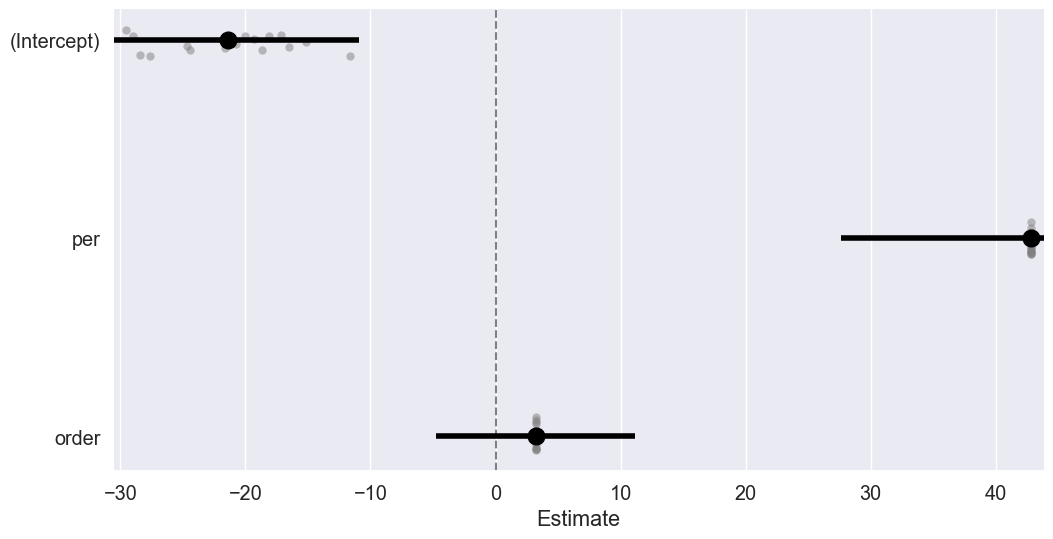

In [93]:
model.plot_summary()


In [95]:
display(model_df)
model_df['dist'].unique()

,Blocktype,tnum,rt,color,per,Amb,choice,dist,side,response,sub,order,choose_risk,full_A,wide_dist
15,Ambiguity,45.0,1534.0,blue,0.50,"[0,1]",Ambiguous,wide,left,j,sub-6081ca47eeed1bb51c1d7f7b,1,False,True,True
16,Ambiguity,46.0,1451.0,blue,0.61,"[0,1]",risk,wide,left,f,sub-6081ca47eeed1bb51c1d7f7b,1,True,True,True
17,Ambiguity,47.0,1595.0,blue,0.55,"[0,1]",Ambiguous,wide,right,f,sub-6081ca47eeed1bb51c1d7f7b,1,False,True,True
18,Ambiguity,48.0,1169.0,blue,0.60,"[0,1]",risk,wide,right,j,sub-6081ca47eeed1bb51c1d7f7b,1,True,True,True
19,Ambiguity,49.0,1566.0,blue,0.58,"[0,1]",risk,wide,right,j,sub-6081ca47eeed1bb51c1d7f7b,1,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Ambiguity,55.0,1306.0,blue,0.56,"[0,1]",risk,wide,right,j,sub-58a2952076c5b7000166150a,1,True,True,True
701,Ambiguity,56.0,1469.0,blue,0.54,"[0,1]",Ambiguous,wide,left,j,sub-58a2952076c5b7000166150a,1,False,True,True
702,Ambiguity,57.0,1445.0,blue,0.57,"[0,1]",Ambiguous,wide,left,j,sub-58a2952076c5b7000166150a,1,False,True,True
703,Ambiguity,58.0,1720.0,blue,0.59,"[0,1]",risk,wide,right,j,sub-58a2952076c5b7000166150a,1,True,True,True


array(['wide'], dtype=object)

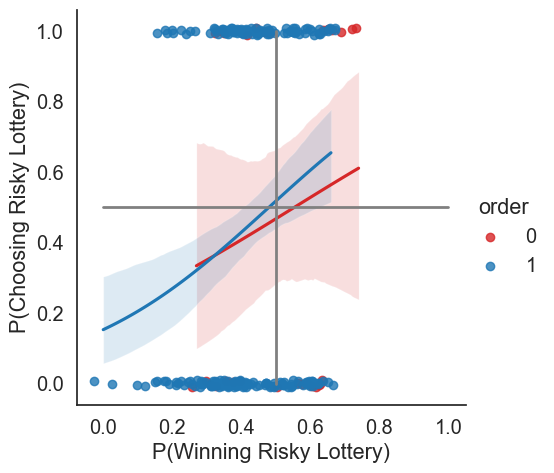

In [97]:
sns.set(font_scale=1.3)
#colors=[plt.cm.tab20c(4),plt.cm.tab20(2)]
with sns.axes_style("white"):
    ax=sns.lmplot(x='per',y='choose_risk',hue='order',hue_order=[0,1],x_jitter=0.05,y_jitter=0.01,
                  data=model_df,logistic=True,palette=['tab:red','tab:blue'])
#plt.legend(labels = ['Narrow First','Narrow Second'],title='Distribution',loc='upper center', bbox_to_anchor=(0.5, 1.05),
#          ncol=2, fancybox=True, shadow=True)
ax.set_xlabels('P(Winning Risky Lottery)')
ax.set_ylabels('P(Choosing Risky Lottery)')
plt.plot([0,1], [0.5,0.5], linewidth=2,color='grey')
plt.plot([.50,.50], [0,1], linewidth=2,color='grey')

In [101]:
from scipy.stats import chisquare
import numpy as np

model_df = model_df.copy()
model_df['per:order'] = model_df['per'] * model_df['order']

# Get predictions and convert from R object to numpy array
predictions = model.predict(model_df, skip_data_checks=True, verify_predictions=False)
y_pred = (np.array(predictions) > 0.5)
y_true = model_df['choose_risk'].values

chisquare([np.sum([a == p for a,p in zip(y_pred,y_true)]),
           np.sum([a != p for a,p in zip(y_pred,y_true)])])

Power_divergenceResult(statistic=123.26666666666667, pvalue=1.2191192989506882e-28)

In [103]:
# Get predictions and convert from R object to numpy array
predictions = model.predict(model_df, skip_data_checks=True, verify_predictions=False)
y_pred = np.array(predictions)
y_true = model_df['choose_risk'].values

def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)

efron_rsquare(y_true, y_pred)

0.5061178562804844

## Mediate Order Effect

In [105]:
model_df1=amb_df[(amb_df['full_A']==True)&(amb_df['dist']=='wide')].reset_index(drop=True)

model = Lmer("choose_risk  ~ per+ (1+per|sub)",
             data=model_df1, family = 'binomial')
model.fit()

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: choose_risk~per+(1+per|sub)

Family: binomial	 Inference: parametric

Number of observations: 240	 Groups: {'sub': 16.0}

Log-likelihood: -133.495 	 AIC: 276.991

Random effects:

            Name      Var     Std
sub  (Intercept)  217.725  14.755
sub          per  947.341  30.779

             IV1  IV2   Corr
sub  (Intercept)  per -0.802

Fixed effects:



/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-30.930,-46.054,-15.807,7.716,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-4.008,0.0,***
per,72.416,37.423,107.410,17.854,2.818442e+31,1.789020e+16,4.440206e+46,1.0,1.0,1.0,4.056,0.0,***


In [107]:
model1_FE=model.fixef.copy()
model1_FE.reset_index(inplace=True)
model1_FE=model1_FE.rename(columns={'index':'sub'})
Med1_df=[]
for sub in model_df1['sub'].unique():
    tmp=sub_df[sub_df['sub']==sub].copy()
    sd_wide=tmp[tmp['dist']=='wide']['stds'].values[0]
    
    mean_wide=tmp[tmp['dist']=='wide']['means'].values[0]
    order=tmp['narrow_first'].values[0]>0
    Int=model1_FE[model1_FE['sub']==sub]['(Intercept)'].values[0]
    ME_per=model1_FE[model1_FE['sub']==sub]['per'].values[0]
    Med1_df.append([sub,order,sd_wide,mean_wide,Int,ME_per])
                                           
Med1_df=pd.DataFrame(columns=['sub','order','SD','Mean','Intercept','ME_Per'],
                    data=Med1_df)
Med1_df['order']=Med1_df['order'].astype(int)


In [109]:
Med1_df

,sub,order,SD,Mean,Intercept,ME_Per
0,sub-6081ca47eeed1bb51c1d7f7b,1,21.317703,71.000000,-20.614789,33.373609
1,sub-611688156f6d22853511ffb3,1,40.280609,29.285714,-32.045778,85.507389
2,sub-5deb638bff7f7126d6fb5142,1,34.338996,42.857143,-36.899439,92.309650
3,sub-5bd6656a669ee1000145304a,1,40.124805,59.000000,-32.289094,89.085996
4,sub-63bb0d793cee514d16b866ef,1,16.914819,28.888889,-15.521797,47.765093
5,sub-63eb13f36c0fe9ba20d45234,1,33.780781,47.567568,-34.376208,88.020838
6,sub-60abdc82ec2d1e548b986424,1,12.292726,32.000000,-45.516854,75.819371
7,sub-61057d03e42ef519f98f4e6d,0,30.807319,69.090909,-26.387776,75.061462
8,sub-63150b2e1cfa995c03244696,1,41.096093,50.000000,-13.124930,67.299330
9,sub-5df81cd72713055bdf02efd8,1,30.242683,35.789474,-30.224913,61.190241


In [113]:
print("Data shape:", Med1_df.shape)
print("\nVariable summaries:")
print(Med1_df[['order', 'SD', 'EP']].describe())
print("\nCheck for missing values:")
print(Med1_df[['order', 'SD', 'EP']].isnull().sum())
print("\nCheck data types:")
print(Med1_df[['order', 'SD', 'EP']].dtypes)

Data shape: (16, 7)

Variable summaries:
           order         SD         EP
count  16.000000  16.000000  16.000000
mean    0.875000  32.738944   0.431656
std     0.341565   9.250690   0.129488
min     0.000000  12.292726   0.195023
25%     1.000000  30.388124   0.346530
50%     1.000000  34.059888   0.395141
75%     1.000000  39.968636   0.520914
max     1.000000  46.475800   0.644221

Check for missing values:
order    0
SD       0
EP       0
dtype: int64

Check data types:
order      int64
SD       float64
EP       float64
dtype: object


In [131]:
#Med1_df_clean = Med1_df[['order', 'SD', 'EP']].dropna()
#Med1_df_clean = Med1_df_clean[np.isfinite(Med1_df_clean).all(axis=1)]

#mediation_analysis(data=Med1_df_clean, x='order',
#                   m=['SD'], y='EP', alpha=0.05, seed=42)


In [133]:
# Try without bootstrapping first
try:
    result = mediation_analysis(data=Med1_df_clean, x='order',
                               m=['SD'], y='EP', alpha=0.05, n_boot=0)
    print(result)
except Exception as e:
    print(f"Error without bootstrapping: {e}")
    
# If that fails, check if you have enough variation
print("\nOrder variable distribution:")
print(Med1_df_clean['order'].value_counts())
print(f"\nProportion of each value:")
print(Med1_df_clean['order'].value_counts(normalize=True))

Error without bootstrapping: Percentiles must be in the range [0, 100]

Order variable distribution:
order
1    14
0     2
Name: count, dtype: int64

Proportion of each value:
order
1    0.875
0    0.125
Name: proportion, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [119]:
print("Correlations:")
corr_matrix = Med1_df_clean[['order', 'SD', 'EP']].corr()
print(corr_matrix)

# Try manual regression to see what's happening
from sklearn.linear_model import LinearRegression

# Path a: order -> SD
print("\nOrder -> SD regression:")
X_a = Med1_df_clean[['order']]
y_a = Med1_df_clean['SD']
reg_a = LinearRegression().fit(X_a, y_a)
print(f"R² = {reg_a.score(X_a, y_a):.4f}")
print(f"Coefficient = {reg_a.coef_[0]:.4f}")

# Path b: SD -> EP (controlling for order)
print("\nSD -> EP regression (controlling for order):")
X_b = Med1_df_clean[['order', 'SD']]
y_b = Med1_df_clean['EP']
reg_b = LinearRegression().fit(X_b, y_b)
print(f"R² = {reg_b.score(X_b, y_b):.4f}")
print(f"SD coefficient = {reg_b.coef_[1]:.4f}")

Correlations:
          order        SD        EP
order  1.000000  0.089332 -0.199657
SD     0.089332  1.000000 -0.361329
EP    -0.199657 -0.361329  1.000000

Order -> SD regression:
R² = 0.0080
Coefficient = 2.4194

SD -> EP regression (controlling for order):
R² = 0.1588
SD coefficient = -0.0048


In [135]:
#Med1_df['EP']=np.divide(np.negative(Med1_df['Intercept'])
#                        ,Med1_df['ME_Per'])
#display(Med1_df.head())
#mediation_analysis(data=Med1_df, x='order',
#                   m=['SD'], y='EP', alpha=0.05,seed=42)

In [137]:
display(Med1_df)
sns.lmplot(x='SD_diff',y='Intercept',data=Med1_df)

,sub,order,SD,Mean,Intercept,ME_Per,EP
0,sub-6081ca47eeed1bb51c1d7f7b,1,21.317703,71.000000,-20.614789,33.373609,0.617697
1,sub-611688156f6d22853511ffb3,1,40.280609,29.285714,-32.045778,85.507389,0.374772
2,sub-5deb638bff7f7126d6fb5142,1,34.338996,42.857143,-36.899439,92.309650,0.399735
3,sub-5bd6656a669ee1000145304a,1,40.124805,59.000000,-32.289094,89.085996,0.362449
4,sub-63bb0d793cee514d16b866ef,1,16.914819,28.888889,-15.521797,47.765093,0.324961
5,sub-63eb13f36c0fe9ba20d45234,1,33.780781,47.567568,-34.376208,88.020838,0.390546
6,sub-60abdc82ec2d1e548b986424,1,12.292726,32.000000,-45.516854,75.819371,0.600333
7,sub-61057d03e42ef519f98f4e6d,0,30.807319,69.090909,-26.387776,75.061462,0.351549
8,sub-63150b2e1cfa995c03244696,1,41.096093,50.000000,-13.124930,67.299330,0.195023
9,sub-5df81cd72713055bdf02efd8,1,30.242683,35.789474,-30.224913,61.190241,0.493950


KeyError: "['SD_diff'] not in index"

In [125]:
from pingouin import mediation_analysis


In [ ]:
plt_df

sub-6081ca47eeed1bb51c1d7f7b


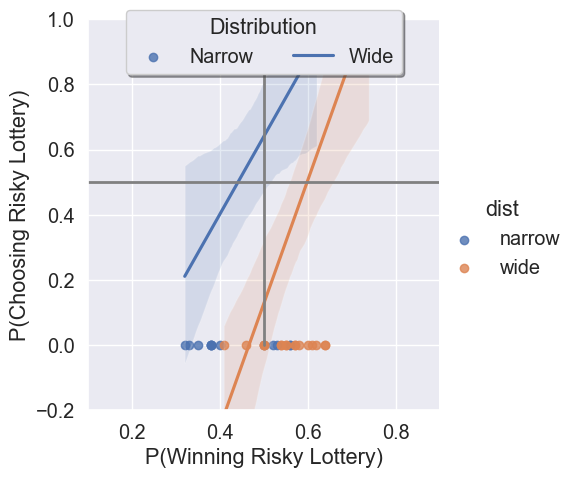

sub-611688156f6d22853511ffb3


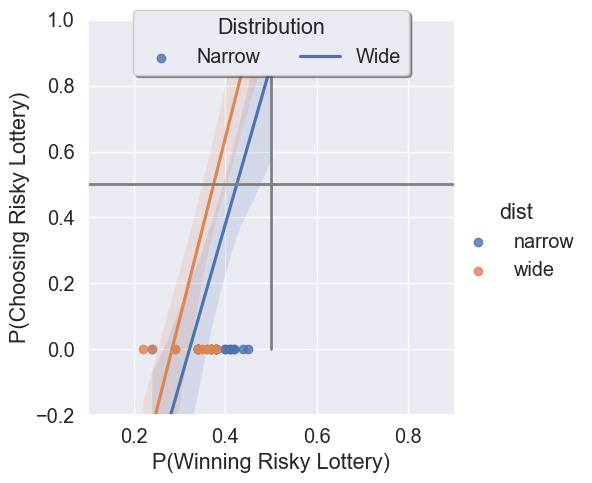

sub-5deb638bff7f7126d6fb5142


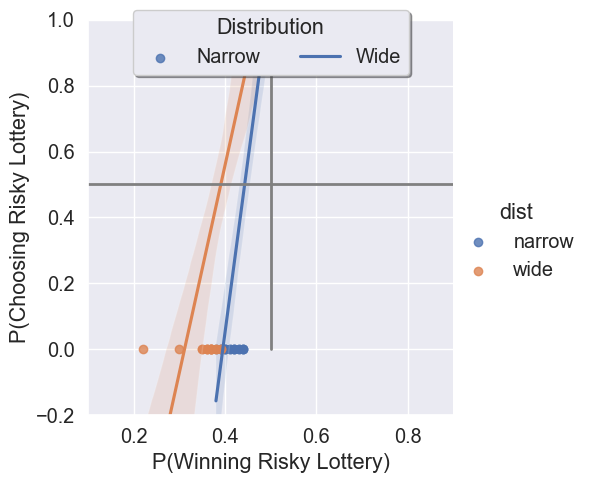

sub-5bd6656a669ee1000145304a


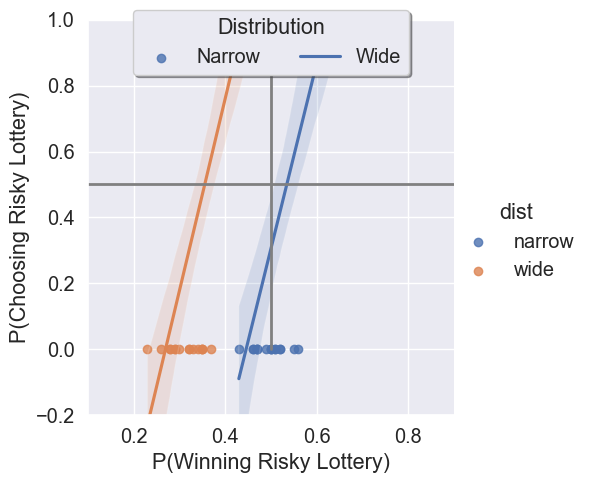

sub-63bb0d793cee514d16b866ef


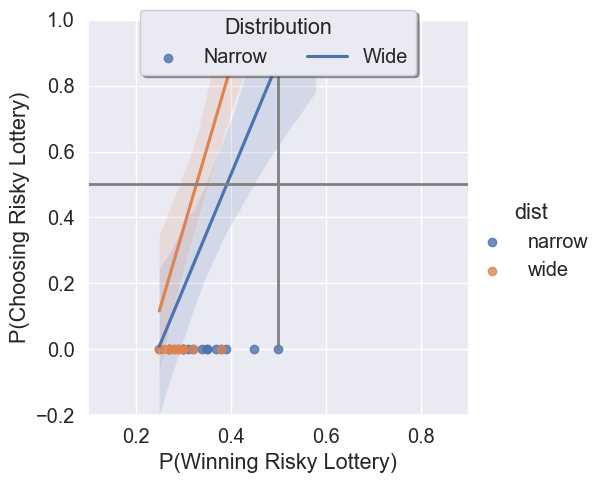

sub-63eb13f36c0fe9ba20d45234


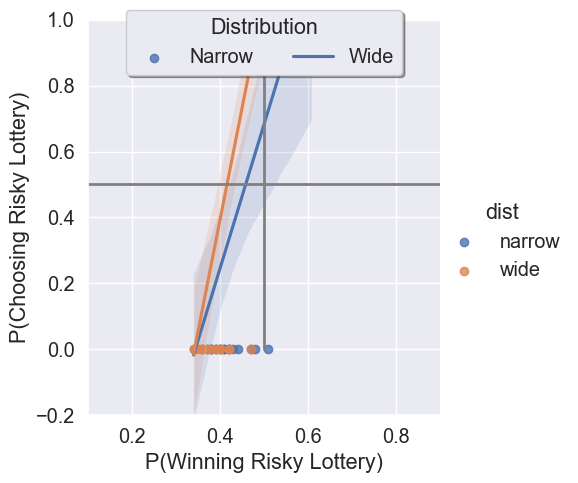

sub-60abdc82ec2d1e548b986424


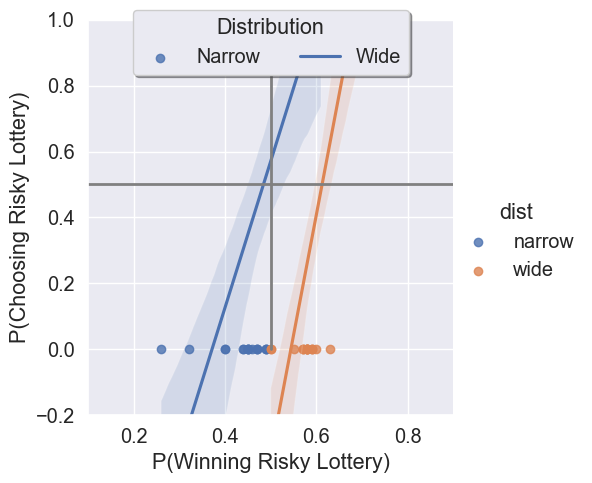

sub-61057d03e42ef519f98f4e6d


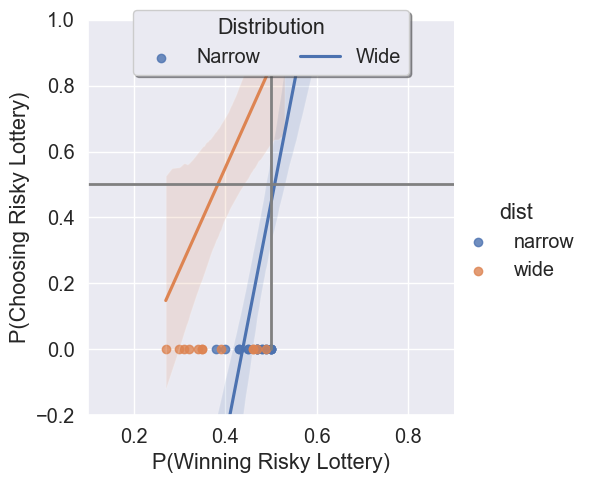

sub-63150b2e1cfa995c03244696


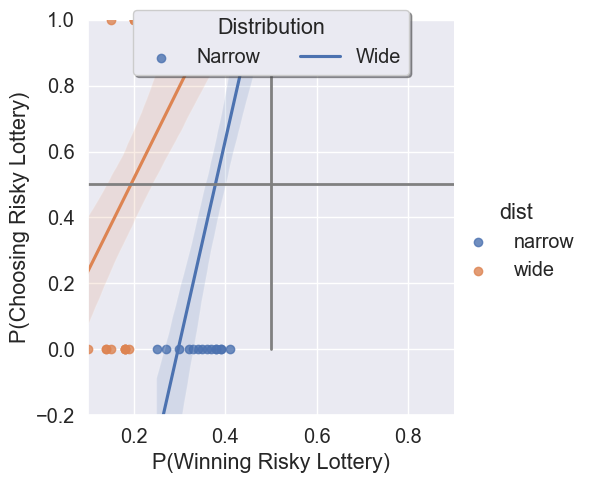

sub-5df81cd72713055bdf02efd8


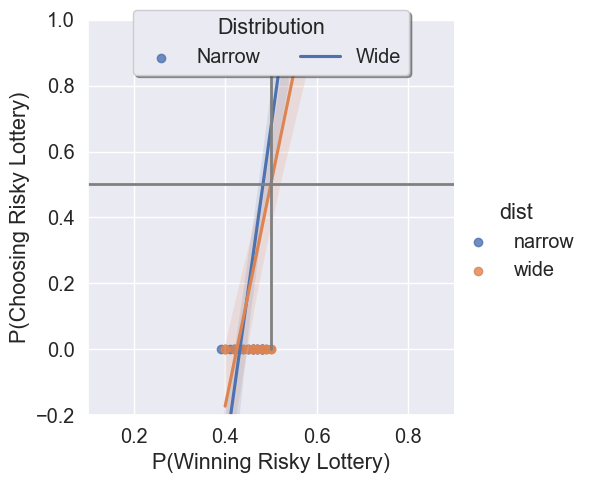

sub-5d8793d36c53380015139da9


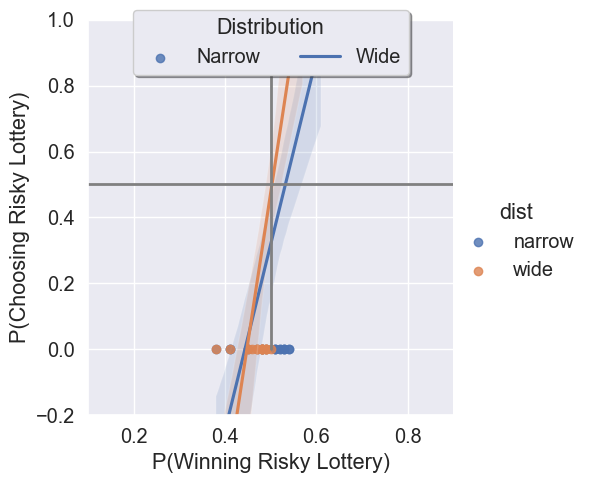

sub-5de7d12c26dd95000b6824c5


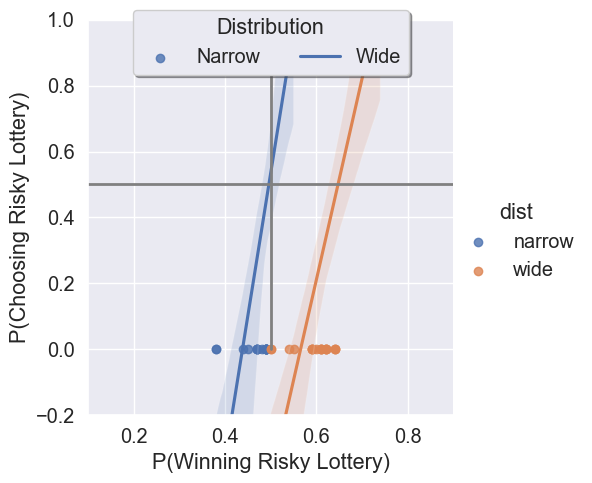

sub-5b6cd50f9ee1a50001c5f481


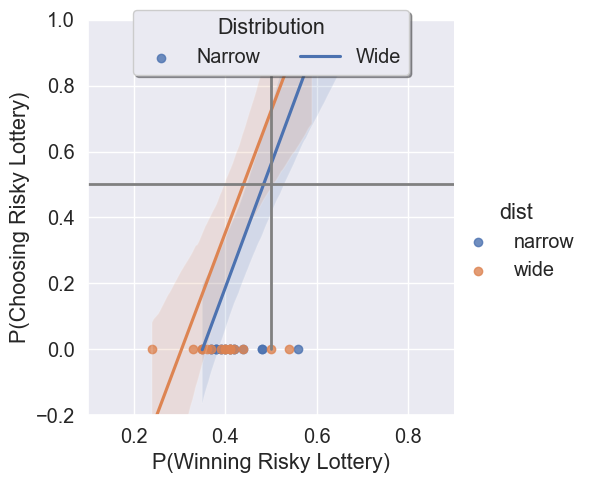

sub-63eac31811a6da58d4f32d76


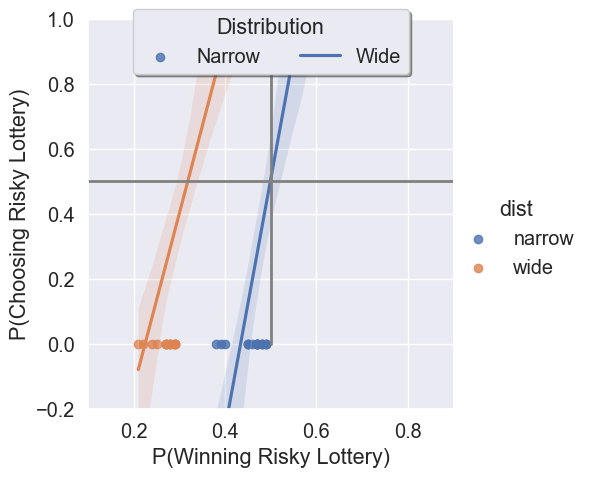

sub-5f51287698edeb30a0cf878d


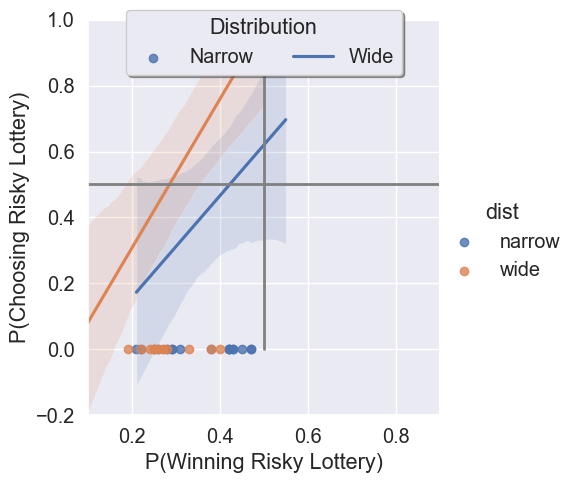

sub-58a2952076c5b7000166150a


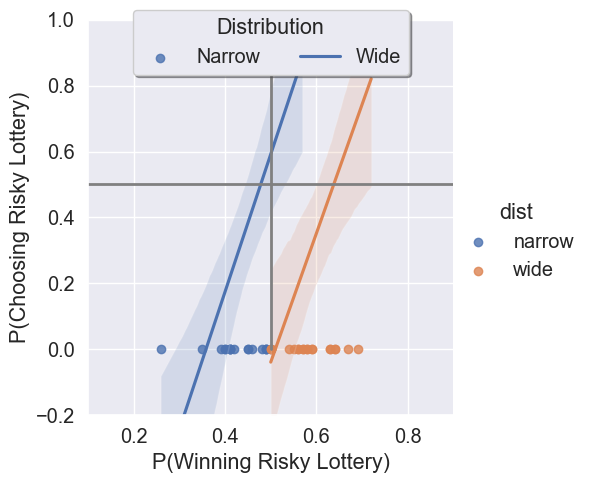

In [127]:
#['sub-59c86f966a287600011c393e','sub-6109dc13ff3d4be24267e74d','sub-5c872cded9fe700001024123','']
for sub in sub_df['sub'].unique():
    print(sub)
    plt_df=amb_df[amb_df['sub']==sub]
    plt_df[plt_df['dist'].isin(['narrow','wide'])]
    ax=sns.lmplot(x='per',y='choose_risk',hue='dist',data=plt_df,hue_order=['narrow','wide'])
    plt.legend(labels = ['Narrow','Wide'],title='Distribution',loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, shadow=True)
    ax.set_xlabels('P(Winning Risky Lottery)')
    ax.set_ylabels('P(Choosing Risky Lottery)')
    ax.axes[0][0].set_xlim(.1, .90)
    ax.axes[0][0].set_ylim(-.2, 1)
    ax.axes[0][0].plot([0,1],[.5,.5],linewidth=2,color='grey')
    ax.axes[0][0].plot([.5,.5],[0,1],linewidth=2,color='grey')
    plt.show()